In [1]:
import pandas as pd 
import numpy as np 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
wiki = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\UCI_wiki4HE\wiki4HE.csv",
                  sep=";",na_values="?")
wiki.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0


In [3]:
wiki.columns

Index(['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
       'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

In [4]:
wiki = wiki.iloc[:,10:]

In [5]:
wiki.columns

Index(['PU1', 'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1',
       'Qu2', 'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3',
       'SA1', 'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1',
       'Pf2', 'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3',
       'Inc4', 'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

In [6]:
wiki.shape

(913, 43)

In [7]:
wiki.head()

,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,2.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,2.0,2.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,4.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0


In [8]:
wiki.isnull().sum().sum()

1052

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imp_wiki = imputer.fit_transform(wiki)
imp_wiki.shape

(913, 43)

In [10]:
imp_wiki = pd.DataFrame(imp_wiki, columns=wiki.columns)
imp_wiki.isnull().sum().sum()

0

# Bartlett's Test of Adequacy

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(imp_wiki)
chi_square_value, p_value 

(20882.110402523525, 0.0)

# KMO

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(imp_wiki)
kmo_model 

C:\Users\Sanjay Sane\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9289611526486001

In [13]:
fa = FactorAnalyzer()
fa.fit(imp_wiki)

FactorAnalyzer(rotation_kwargs={})

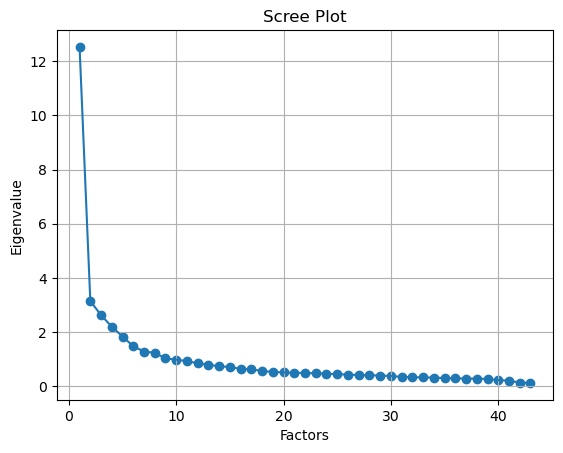

In [14]:
eigen_values, vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,imp_wiki.shape[1]+1),eigen_values)
plt.plot(range(1,imp_wiki.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# 7 Factors

In [15]:
fa = FactorAnalyzer()
fa.set_params(n_factors=7, rotation='varimax')
fa.fit(imp_wiki)
loadings = fa.loadings_
factor_df=pd.DataFrame(loadings,index=imp_wiki.columns)
fc_cols = ['Factor'+str(i) for i in range(1, 8)]
factor_df.columns = fc_cols
factor_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
PU1,0.565475,0.111878,0.427230,0.132336,-0.020143,0.126200,0.081587
PU2,0.601634,0.052610,0.420882,0.110221,0.003095,0.122455,0.069746
PU3,0.684162,0.055791,0.324175,0.067406,0.144588,0.194981,0.038815
PEU1,-0.036741,-0.098810,0.490733,0.014626,0.301253,0.099084,0.045183
PEU2,0.132157,-0.040990,0.536007,0.091022,0.169524,0.228473,0.020531
PEU3,0.069882,0.319597,0.413436,0.009614,0.008173,0.001915,0.143681
ENJ1,0.308927,0.019781,0.550031,0.128896,0.125386,0.109442,0.043642
ENJ2,0.167579,0.068692,0.645139,0.143988,0.186713,0.091278,0.079543
Qu1,0.422522,0.017625,0.183757,0.091939,0.158698,0.726770,-0.000204
Qu2,0.329412,0.057840,0.224943,0.099696,0.124888,0.697287,-0.011607


In [16]:
fact1_cols = list(factor_df[factor_df['Factor1']>0.6].index)
fact2_cols = list(factor_df[factor_df['Factor2']>0.6].index)
fact3_cols = list(factor_df[factor_df['Factor3']>0.6].index)
fact4_cols = list(factor_df[factor_df['Factor4']>0.6].index)
fact5_cols = list(factor_df[factor_df['Factor5']>0.6].index)
fact6_cols = list(factor_df[factor_df['Factor6']>0.6].index)
fact7_cols = list(factor_df[factor_df['Factor7']>0.6].index)

In [17]:
print("Factor 1:", fact1_cols)
print("Factor 2:", fact2_cols)
print("Factor 3:", fact3_cols)
print("Factor 4:", fact4_cols)
print("Factor 5:", fact5_cols)
print("Factor 6:", fact6_cols)
print("Factor 7:", fact7_cols)


Factor 1: ['PU2', 'PU3', 'Vis3', 'Use1', 'Use3', 'Use4', 'Use5', 'BI1', 'BI2', 'Exp1']
Factor 2: ['Pf1', 'Pf2', 'Pf3']
Factor 3: ['ENJ2']
Factor 4: ['Inc1', 'Inc2', 'Inc3', 'Inc4']
Factor 5: ['SA1', 'SA2', 'SA3']
Factor 6: ['Qu1', 'Qu2']
Factor 7: ['JR1', 'JR2']


In [18]:
questions = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\UCI_wiki4HE\Questions.csv",
                        index_col=0)
questions.index

Index(['PU1', 'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'QU1',
       'QU2', 'QU3', 'QU4', 'QU5', 'VIS1', 'VIS2', 'VIS3', 'IM1', 'IM2', 'IM3',
       'SA1', 'SA2', 'SA3', 'USE1', 'USE2', 'USE3', 'USE4', 'USE5', 'PF1',
       'PF2', 'PF3', 'JR1', 'JR2', 'BI1', 'BI2', 'INC1', 'INC2', 'INC3',
       'INC4', 'EXP1', 'EXP2', 'EXP3', 'EXP4', 'EXP5'],
      dtype='object', name='Qno')

In [19]:
fact1_cols = [d.upper() for d in fact1_cols]
fact2_cols = [d.upper() for d in fact2_cols]
fact3_cols = [d.upper() for d in fact3_cols]
fact4_cols = [d.upper() for d in fact4_cols]
fact5_cols = [d.upper() for d in fact5_cols]
fact6_cols = [d.upper() for d in fact6_cols]
fact7_cols = [d.upper() for d in fact7_cols]

### Factor 1:  Academic Use

In [20]:
questions.loc[fact1_cols]

,Question
Qno,
PU2,The use of Wikipedia improves students' learning
PU3,Wikipedia is useful for teaching
VIS3,I cite Wikipedia in my academic papers
USE1,I use Wikipedia to develop my teaching materials
USE3,I recommend my students to use Wikipedia
USE4,I recommend my colleagues to use Wikipedia
USE5,I agree my students use Wikipedia in my courses
BI1,In the future I will recommend the use of Wik...
BI2,In the future I will use Wikipedia in my teac...


### Factor 2: Communicating the information

In [21]:
questions.loc[fact2_cols]

,Question
Qno,
PF1,I contribute to blogs
PF2,I actively participate in social networks
PF3,I publish academic content in open platforms


### Factor 3: Entertainment

In [22]:
questions.loc[fact3_cols]

,Question
Qno,
ENJ2,The use of Wikipedia is entertaining


### Factor 4:  Educational Activities

In [23]:
questions.loc[fact4_cols]

,Question
Qno,
INC1,To design educational activities using Wikipe...
INC2,To design educational activities using Wikipe...
INC3,To design educational activities using Wikipe...
INC4,To design educational activities using Wikipe...


### Factor 5: Knowledge Sharing

In [24]:
questions.loc[fact5_cols]

,Question
Qno,
SA1,It is important to share academic content in ...
SA2,It is important to publish research results i...
SA3,It is important that students become familiar...


### Factor 6:  Reliability

In [25]:
questions.loc[fact6_cols]

,Question
Qno,
QU1,Articles in Wikipedia are reliable
QU2,Articles in Wikipedia are updated


### Factor 7:  Open Collaborative Environments

In [26]:
questions.loc[fact7_cols]

,Question
Qno,
JR1,My university promotes the use of open collab...
JR2,My university considers the use of open colla...
